# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nalut
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | harda khas
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | labrador city
Processing Record 7 of Set 1 | the pas
Processing Record 8 of Set 1 | tofol
Processing Record 9 of Set 1 | codrington
Processing Record 10 of Set 1 | spassk
Processing Record 11 of Set 1 | crane
Processing Record 12 of Set 1 | tralee
Processing Record 13 of Set 1 | east london
Processing Record 14 of Set 1 | atafu village
Processing Record 15 of Set 1 | college
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | acapulco de juarez
Processing Record 18 of Set 1 | port mathurin
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | lompoc
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | uttarkashi
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nalut,30.3333,10.8500,34.39,11,50,5.16,LY,1718057958
1,port-aux-francais,-49.3500,70.2167,4.88,79,100,21.10,TF,1718057833
2,puerto natales,-51.7236,-72.4875,1.12,97,100,1.28,CL,1718057842
3,harda khas,22.3333,77.1000,33.22,40,100,0.56,IN,1718057959
4,waitangi,-43.9535,-176.5597,10.46,95,100,0.45,NZ,1718057839


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nalut,30.3333,10.8500,34.39,11,50,5.16,LY,1718057958
1,port-aux-francais,-49.3500,70.2167,4.88,79,100,21.10,TF,1718057833
2,puerto natales,-51.7236,-72.4875,1.12,97,100,1.28,CL,1718057842
3,harda khas,22.3333,77.1000,33.22,40,100,0.56,IN,1718057959
4,waitangi,-43.9535,-176.5597,10.46,95,100,0.45,NZ,1718057839


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

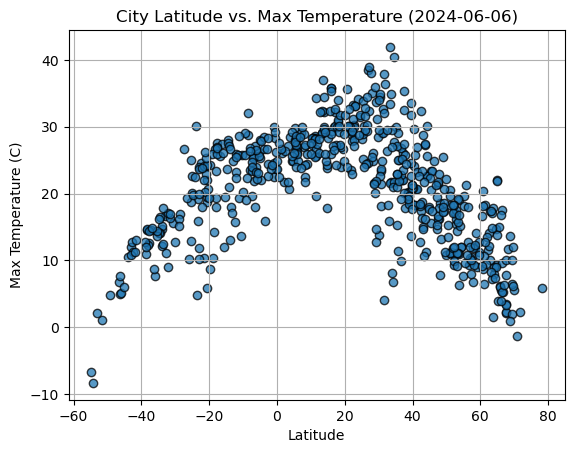

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-06-06)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

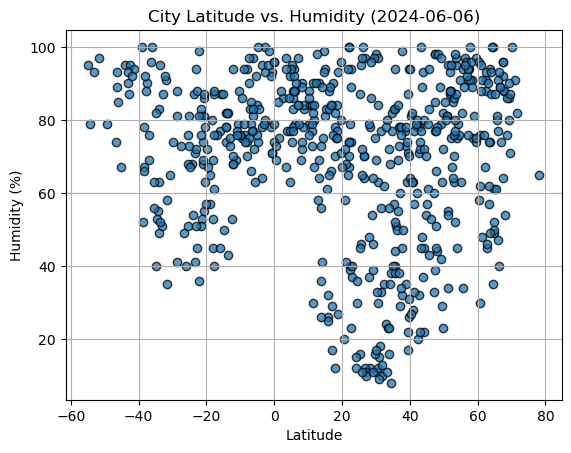

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-06)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

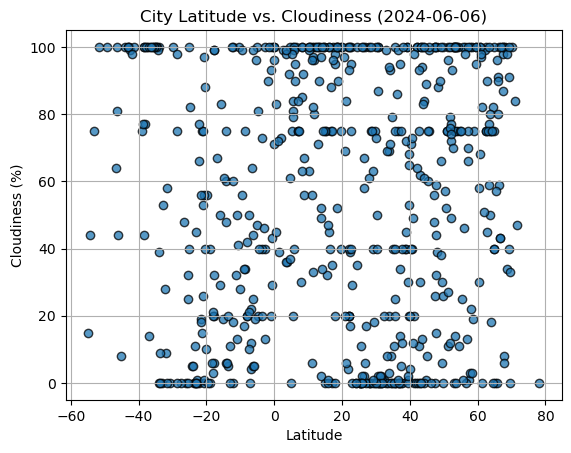

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-06)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

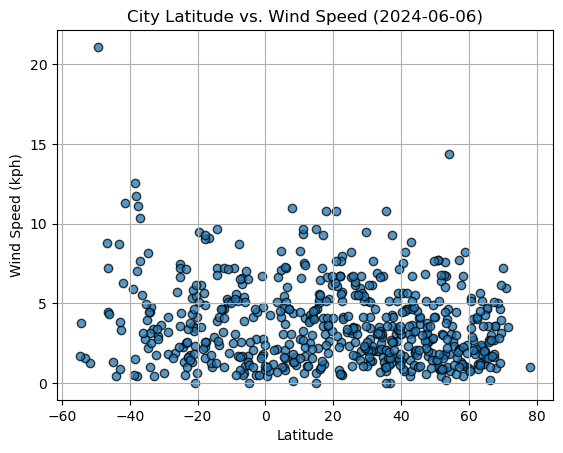

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-06)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return print(f"The r-value is {rvalue**2}"),plt.scatter(x_values,y_values),plt.plot(x_values,regress_values,"r-"),plt.annotate(line_eq,(max(x_values),max(y_values)),fontsize=10,color="red")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nalut,30.3333,10.8500,34.39,11,50,5.16,LY,1718057958
3,harda khas,22.3333,77.1000,33.22,40,100,0.56,IN,1718057959
5,labrador city,52.9463,-66.9114,16.95,63,75,7.60,CA,1718057864
6,the pas,53.8251,-101.2541,19.01,45,75,4.63,CA,1718057959
7,tofol,5.3248,163.0078,29.88,74,75,3.09,FM,1718057903


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,4.88,79,100,21.10,TF,1718057833
2,puerto natales,-51.7236,-72.4875,1.12,97,100,1.28,CL,1718057842
4,waitangi,-43.9535,-176.5597,10.46,95,100,0.45,NZ,1718057839
8,codrington,-38.2667,141.9667,14.49,67,100,11.72,AU,1718057833
12,east london,-33.0153,27.9116,16.59,51,0,3.41,ZA,1718057620


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.5620518124879866


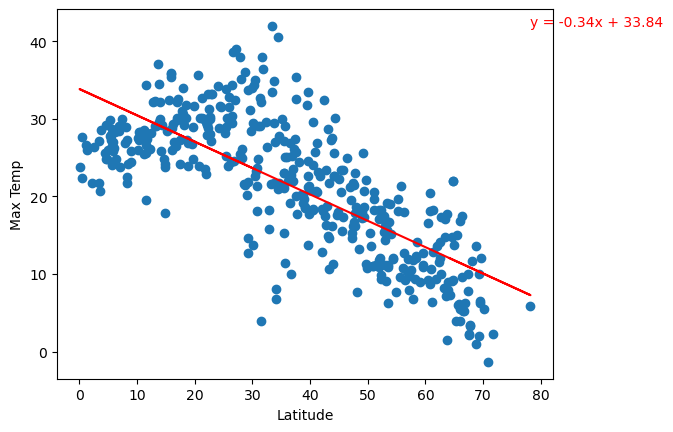

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
linear_regression(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

The r-value is 0.6123190929224436


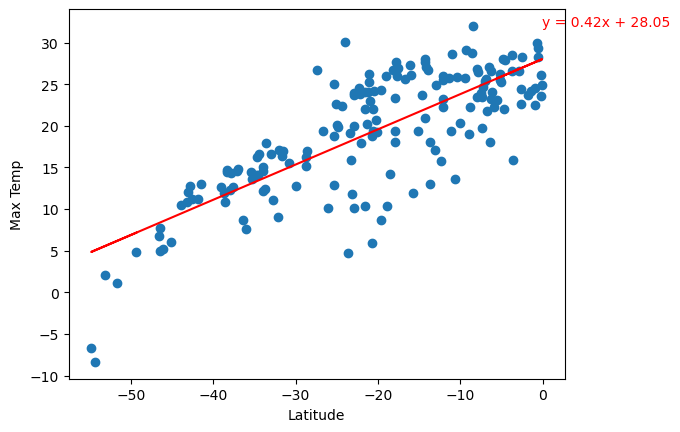

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
linear_regression(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** 
In the Northern Hemisphere, there exists a negative relationship between latitude and maximum temperature. As latitude increases, the maximum temperature tends to decrease. Conversely, in the Southern Hemisphere, there is a positive relationship observed between latitude and maximum temperature. As latitude decreases, the maximum temperature tends to rise. This suggests a contrasting pattern between the two hemispheres. Additionally, approaching zero latitude, or nearing the equator, corresponds to an increase in maximum temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.004856182142491526


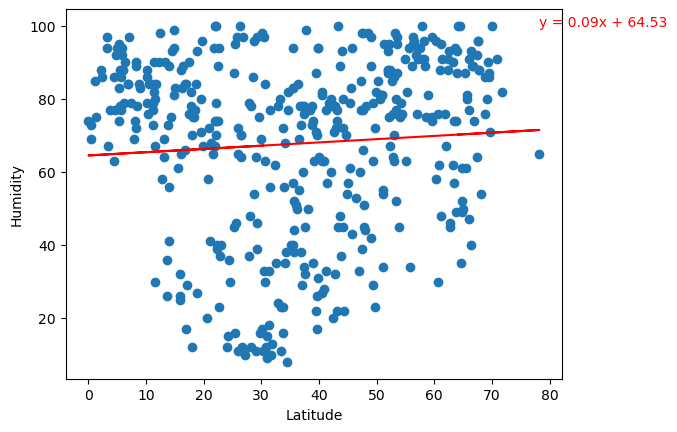

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
linear_regression(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()



The r-value is 0.002474964288251083


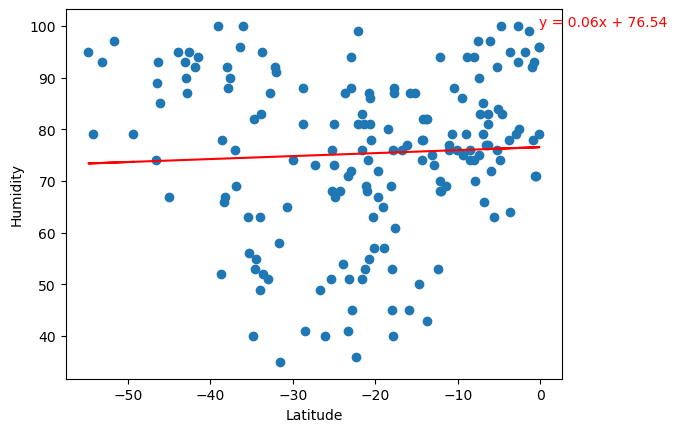

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
linear_regression(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** 
In the Northern Hemisphere, there is a very slight increase in humidity as latitude increases. Similarly, in the Southern Hemisphere, humidity also increases with latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.0007659064478791308


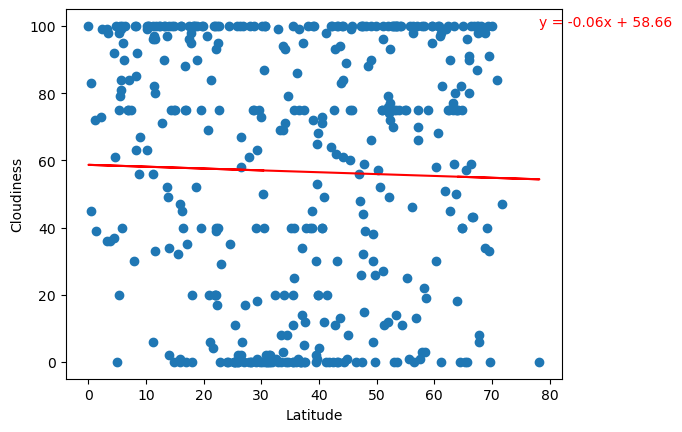

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
linear_regression(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is 0.045532697072532526


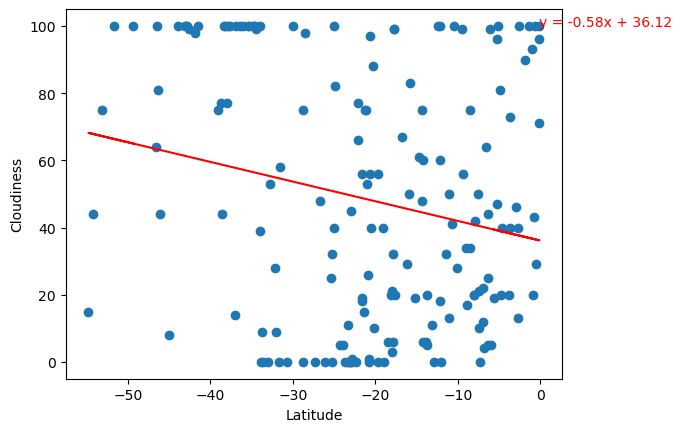

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
linear_regression(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** 
In the Northern Hemisphere, there is a subtle decrease in cloudiness as latitude increases. Similarly, in the Southern Hemisphere, cloudiness also decreases with increasing latitude, with a steeper slope observed compared to the Northern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.020102592495818642


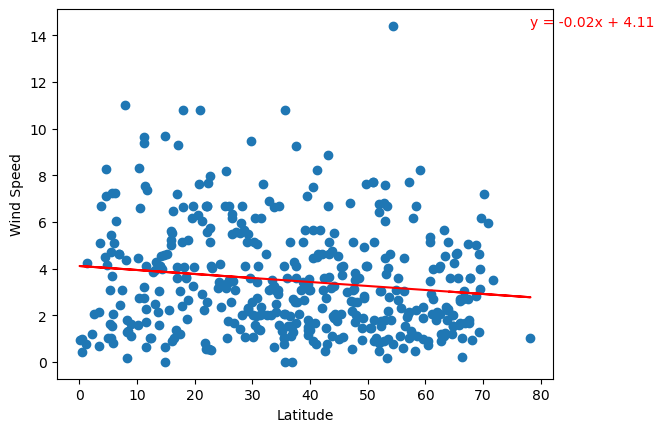

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
linear_regression(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-value is 0.03972528901728772


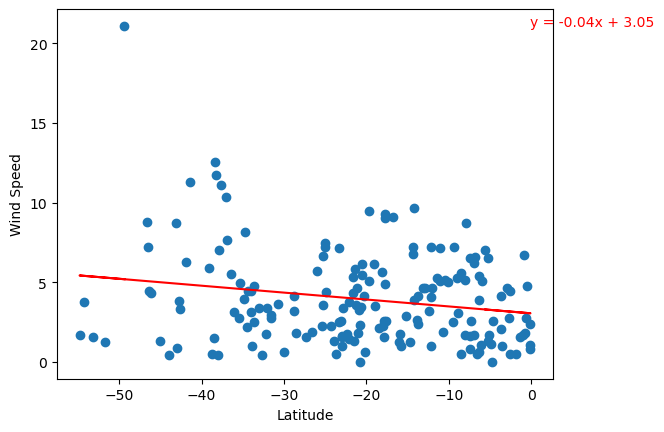

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
linear_regression(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** In both the Northern and Southern Hemispheres, wind speed exhibits a scattered distribution. Specifically, in the Northern Hemisphere, wind speed shows a slight decrease as latitude increases. Similarly, in the Southern Hemisphere, wind speed also tends to drop with increasing latitude.